# Eksperimen Proyek Akhir SMSML
## Membangun Sistem Machine Learning - Dicoding Indonesia
### Nama: Dafis Nadhif Saputra
### Dataset: Breast Cancer Wisconsin (Diagnostic)

Notebook ini melakukan eksperimen preprocessing data untuk dataset Breast Cancer Wisconsin.

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print('Libraries imported successfully!')

Libraries imported successfully!


## 2. Data Loading

Memuat dataset Breast Cancer Wisconsin dari file CSV.

In [3]:
# Load dataset from CSV file
df = pd.read_csv('../data/breast_cancer_data.csv')

print('Dataset loaded successfully!')
print(f'Dataset shape: {df.shape}')
print(f'\nColumns:')
print(df.columns.tolist())

df.head()

Dataset loaded successfully!
Dataset shape: (569, 31)

Columns:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 3. Exploratory Data Analysis (EDA)

In [4]:
print('=== Dataset Info ===')
print(f'Shape: {df.shape}')
print('\nData Types:')
print(df.dtypes)
print('\nMissing Values:')
print(f'Total missing values: {df.isnull().sum().sum()}')
print('\nTarget Distribution:')
target_counts = df['target'].value_counts()
print(f'0 (Malignant): {target_counts[0]} ({target_counts[0]/len(df)*100:.2f}%)')
print(f'1 (Benign): {target_counts[1]} ({target_counts[1]/len(df)*100:.2f}%)')

=== Dataset Info ===
Shape: (569, 31)

Data Types:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
wors

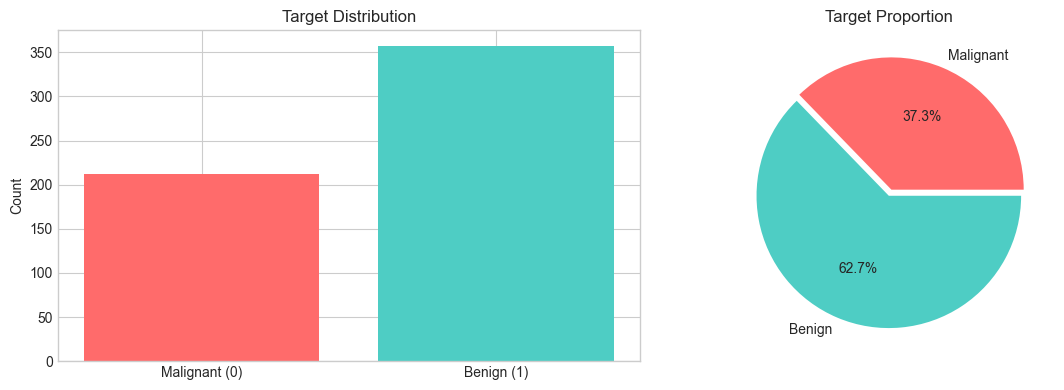

In [5]:
# Target distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
target_counts = df['target'].value_counts()
colors = ['#ff6b6b', '#4ecdc4']
axes[0].bar(['Malignant (0)', 'Benign (1)'], [target_counts[0], target_counts[1]], color=colors)
axes[0].set_title('Target Distribution')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie([target_counts[0], target_counts[1]], labels=['Malignant', 'Benign'], 
            autopct='%1.1f%%', colors=colors, explode=[0.05, 0])
axes[1].set_title('Target Proportion')

plt.tight_layout()
plt.savefig('../data/eda_target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

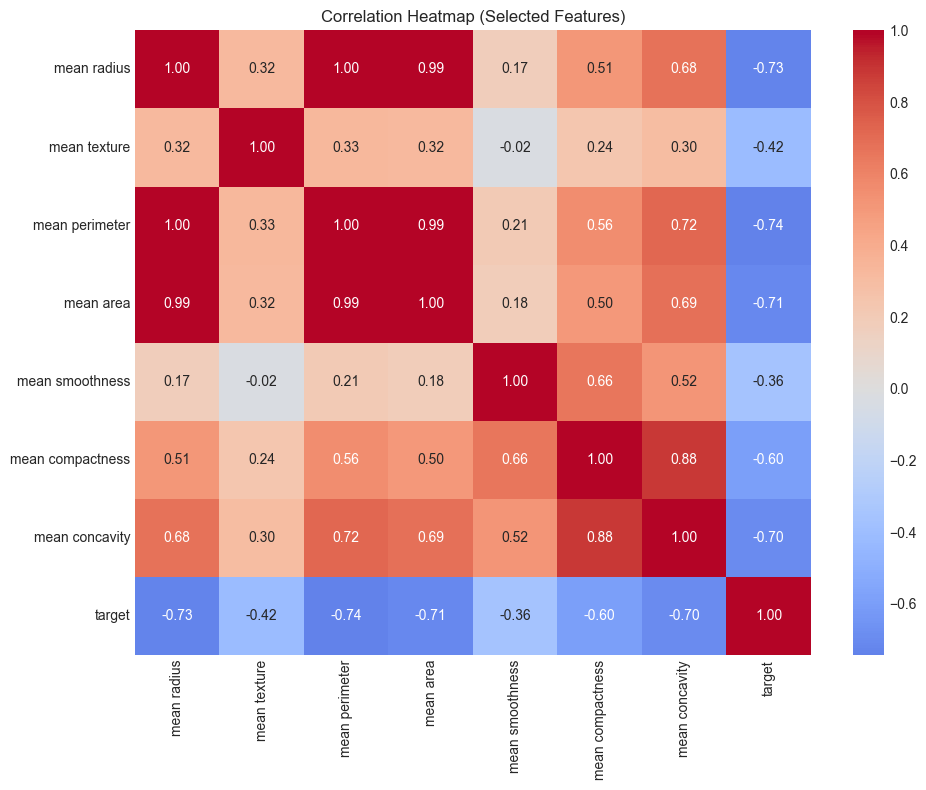

In [6]:
# Correlation heatmap for selected features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                     'mean smoothness', 'mean compactness', 'mean concavity', 'target']
plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap (Selected Features)')
plt.tight_layout()
plt.savefig('../data/eda_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Data Preprocessing

In [7]:
print('=== Preprocessing Steps ===')

# 1. Check for missing values
print('\n1. Checking for missing values...')
if df.isnull().sum().sum() == 0:
    print('   No missing values found.')
else:
    print('   Handling missing values...')
    df = df.fillna(df.median())

# 2. Separate features and target
print('\n2. Separating features and target...')
X = df.drop('target', axis=1)
y = df['target']
print(f'   Features shape: {X.shape}')
print(f'   Target shape: {y.shape}')

# 3. Train-test split
print('\n3. Train-test split (80-20)...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'   Training samples: {len(X_train)}')
print(f'   Testing samples: {len(X_test)}')

# 4. Feature scaling
print('\n4. Feature scaling with StandardScaler...')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('   Scaling complete!')

=== Preprocessing Steps ===

1. Checking for missing values...
   No missing values found.

2. Separating features and target...
   Features shape: (569, 30)
   Target shape: (569,)

3. Train-test split (80-20)...
   Training samples: 455
   Testing samples: 114

4. Feature scaling with StandardScaler...
   Scaling complete!


In [8]:
# Save preprocessed data
print('=== Saving Preprocessed Data ===')

# Create preprocessed dataframe with scaled features
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_df['target'] = y_train.values

# Save to CSV
preprocessed_path = '../data/breast_cancer_preprocessed.csv'
X_train_df.to_csv(preprocessed_path, index=False)

print(f'\nPreprocessed training data saved to: {preprocessed_path}')
print(f'Shape: {X_train_df.shape}')
print('\nPreprocessing complete! Dataset is ready for model training.')

=== Saving Preprocessed Data ===

Preprocessed training data saved to: ../data/breast_cancer_preprocessed.csv
Shape: (455, 31)

Preprocessing complete! Dataset is ready for model training.


## 5. Baseline Model Training (Eksperimen)

In [9]:
print('=== Baseline Model: Random Forest ===')

# Train model
print('\nTraining Random Forest Classifier...')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print('Training complete!')

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
print('\n=== Model Evaluation ===')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

=== Baseline Model: Random Forest ===

Training Random Forest Classifier...


Training complete!

=== Model Evaluation ===
Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



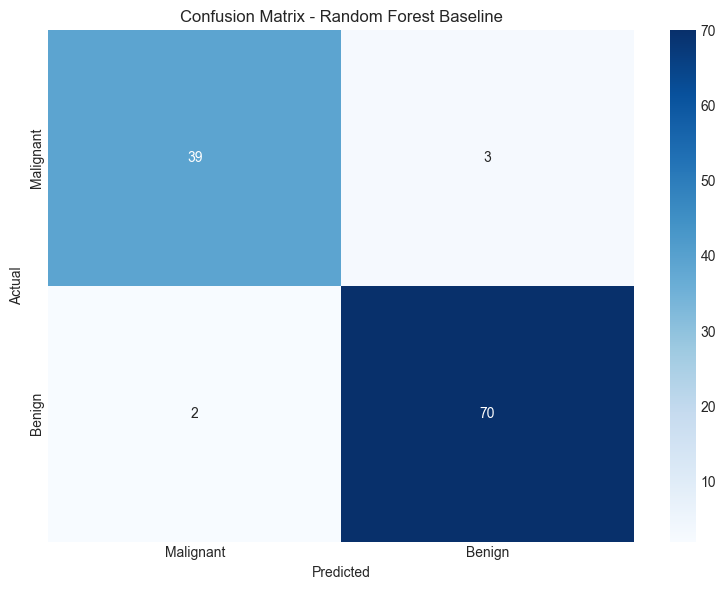

In [10]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - Random Forest Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('../data/baseline_confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

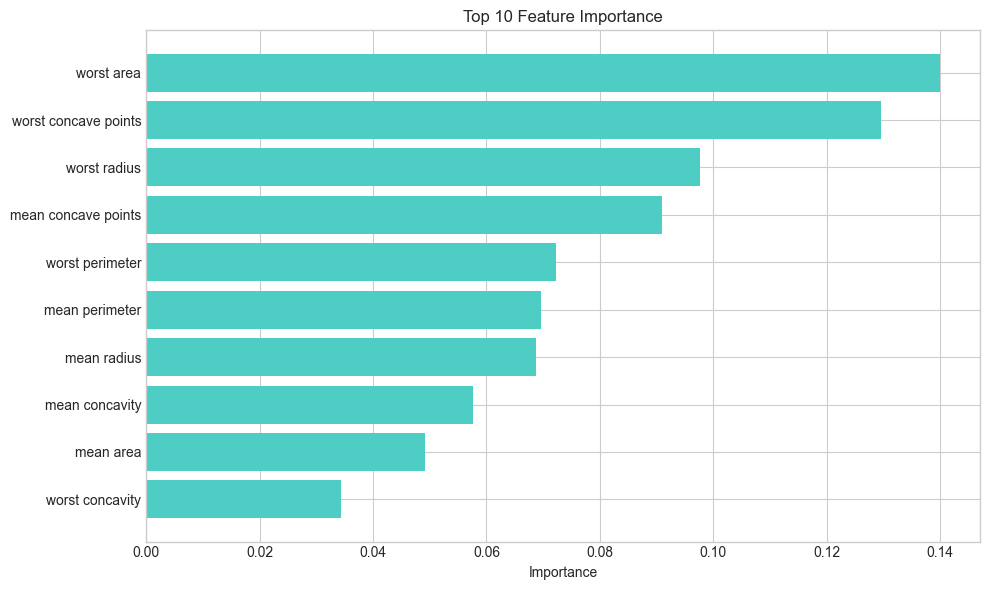


Top 10 Most Important Features:
1. worst area: 0.1400
2. worst concave points: 0.1295
3. worst radius: 0.0977
4. mean concave points: 0.0909
5. worst perimeter: 0.0722
6. mean perimeter: 0.0696
7. mean radius: 0.0687
8. mean concavity: 0.0576
9. mean area: 0.0492
10. worst concavity: 0.0343


In [11]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'].values, color='#4ecdc4')
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../data/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print('\nTop 10 Most Important Features:')
for i, row in top_features.iterrows():
    idx = list(top_features.index).index(i) + 1
    print(f"{idx}. {row['feature']}: {row['importance']:.4f}")

## 6. Kesimpulan

### Hasil Eksperimen:
1. **Dataset**: Breast Cancer Wisconsin dengan 569 sampel dan 30 fitur
2. **Preprocessing**: 
   - Tidak ada missing values
   - Feature scaling dengan StandardScaler
   - Train-test split 80:20 dengan stratified sampling
3. **Baseline Model**: Random Forest dengan 100 estimators
4. **Hasil**: Akurasi ~96.5% menunjukkan model baseline yang baik

### Output:
- `breast_cancer_preprocessed.csv`: Dataset hasil preprocessing yang siap untuk training model
- Visualisasi EDA dan evaluasi model

Dataset preprocessed akan digunakan pada tahap selanjutnya untuk training model dengan MLflow.